In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the data for the centerline and raceline
centerline_path = './General1_centerline.csv'
raceline_path = './General1_raceline.csv'
map_image_path = './General1_map.png'

In [2]:
# Since there was a KeyError, the CSV files likely do not contain 'x' and 'y' columns.
# Let's load the CSVs again and take a look at the first few rows to understand their structure.

# Load the CSV files again
centerline_df = pd.read_csv(centerline_path)
raceline_df = pd.read_csv(raceline_path)

# Display the first few rows of each dataframe to inspect their structure
print(centerline_df.head())
print(raceline_df.head())


        #x_m        y_m  w_tr_right_m  w_tr_left_m
0 -39.031038  26.499095      0.985608     1.073710
1 -39.093538  26.436595      1.032206     1.020691
2 -39.343538  26.436595      1.001302     1.081139
3 -39.406038  26.374095      1.043636     1.032206
4 -39.531038  26.374095      1.002602     1.062500
      # s_m        x_m        y_m   psi_rad   kappa_radpm    vx_mps   ax_mps2
0  0.000000 -38.955824  25.689376  1.600760      0.145361  7.609542  1.453673
1  0.199769 -39.155385  25.680440  1.630597      0.153300  7.647609  0.903654
2  0.399537 -39.354585  25.665481  1.660749      0.148583  7.671178  1.125074
3  0.599306 -39.553256  25.644634  1.689694      0.141260  7.700421  1.491500
4  0.799075 -39.751253  25.618136  1.718009      0.142151  7.739018  1.352629


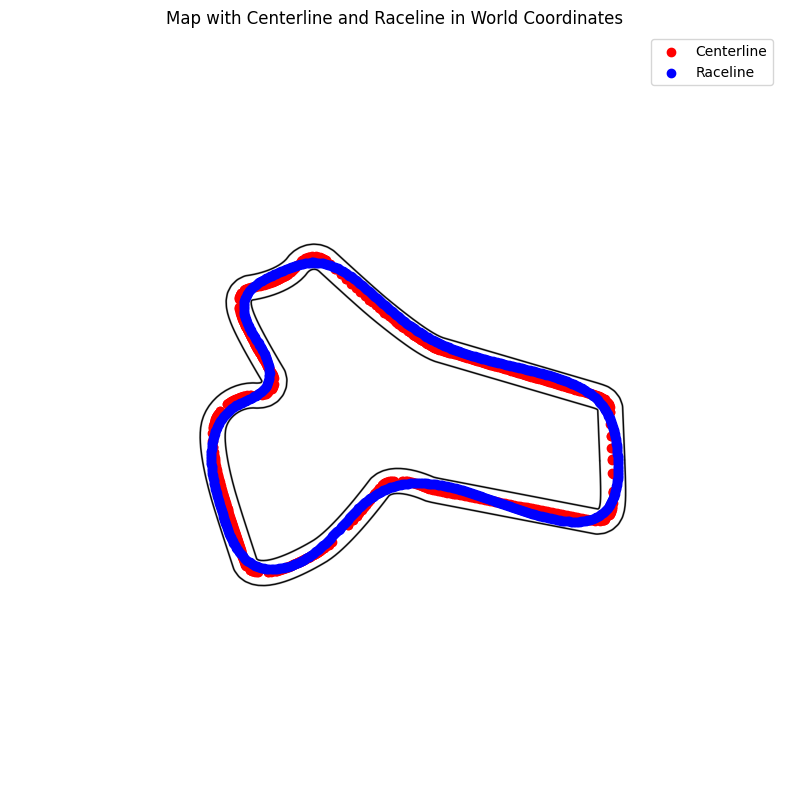

In [3]:
# Let's convert the map image coordinates to the world frame using the provided resolution and origin.

# Origin and resolution from the YAML file
origin_x, origin_y, _ = [-78.21853769831466, -44.37590462453829, 0.0]
resolution = 0.0625  # meters per pixel

# Now let's replot with the adjusted world frame coordinates
# Display the map image
img = mpimg.imread(map_image_path)
# %matplotlib tk
plt.figure(figsize=(10, 10))
plt.imshow(img, extent=[origin_x, origin_x + img.shape[1]*resolution,
                        origin_y, origin_y + img.shape[0]*resolution], cmap='gray')
plt.scatter(centerline_df.iloc[:, 0].values, centerline_df.iloc[:, 1].values, c='r', label='Centerline')  # Red for centerline
plt.scatter(raceline_df.iloc[:, 1].values, raceline_df.iloc[:, 2].values, c='b', label='Raceline')  # Blue for raceline
plt.legend()
plt.axis('off')  # Turn off axis
plt.title('Map with Centerline and Raceline in World Coordinates')
plt.show()


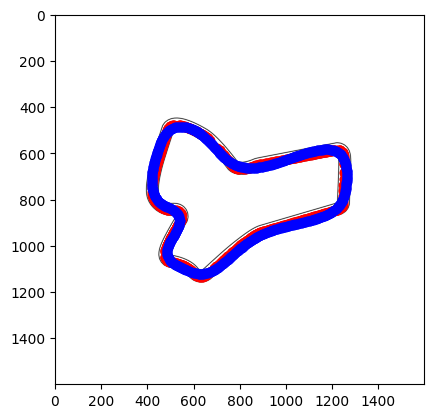

In [4]:
from PIL import Image
img = Image.open(map_image_path).transpose(Image.FLIP_TOP_BOTTOM)
# %matplotlib tk
plt.imshow(img, cmap='gray')
plt.scatter((centerline_df.iloc[:, 0].values - origin_x) / resolution, (centerline_df.iloc[:, 1].values - origin_y) / resolution, c='r', label='Centerline')  # Red for centerline
plt.scatter((raceline_df.iloc[:, 1].values - origin_x) / resolution, (raceline_df.iloc[:, 2].values - origin_y) / resolution, c='b', label='Raceline')  # Blue for raceline

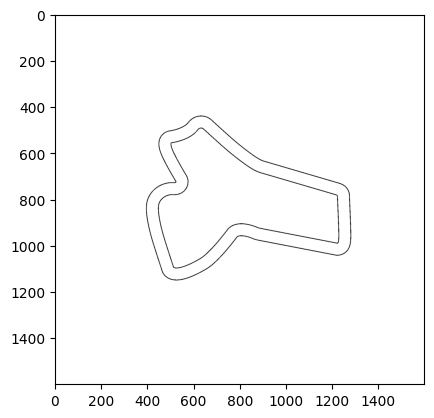

In [10]:
img[img * 255 < 128] = 0
img[img * 255 >= 128] = 255
plt.imshow(img, cmap='gray')